In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob
import pingouin as pg
import statsmodels.api as sm

c:\users\aucouturier\appdata\local\programs\python\python36\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


# The shallow of your smile: The ethics of expressive vocal deep-fakes
Data analysis, Nadia Guerouaou & JJ Aucouturier, 2020

## Data preparation

N=303  participants  (M=25.7;  female:  156)  took  part  in  an  online  study,  administered  via  Qualtrics  questionnaire  (Qualtrics  International  Inc.,  Seattle,  WA).  In this section, we process the Qualtrics raw data into a pandas dataframe suitable for statistical analysis

### Select useful data and merge

In [2]:
male_df = pd.read_csv('data/male.csv')
female_df = pd.read_csv('data/female.csv')

In [3]:
# select useful columns

col_demographics = ['id', # non insead participants have NaN id
                    'Duration (in seconds)',# to filter highjacking 
                    'StartDate', # to filter true participants
                    'Status', # "IP Address"
                    'Progress', #100%
                    'gender', # check consistency
                    'age',
                    'Q121', #medical
                    'academic background']

# PR: prothèse; SE/OT: self/other; LE/RI/FB: left/right/fb; RE/EN: repair/enhance; SM/AN/CO: smile/anxiety/colere
col_self_vignettes = ['1-PR-SE-LE-RE-SM-1','1-PR-SE-LE-RE-SM-2','1-PR-SE-LE-RE-SM-3',
                      '2-PR-SE-LE-RE-AN-1','2-PR-SE-LE-RE-AN-2','2-PR-SE-LE-RE-AN-3',
                      '3-PR-SE-LE-EN-SM-1','3-PR-SE-LE-EN-SM-2','3-PR-SE-LE-EN-SM-3',
                      '4-PR-SE-LE-EN-AN-1','4-PR-SE-LE-EN-AN-2','4-PR-SE-LE-EN-AN-3',
                      '5-PR-SE-RI-RE-CO-1', '5-PR-SE-RI-RE-CO-2', '5-PR-SE-RI-RE-CO-3',
                      '6-PR-SE-RI-RE-SM-1', '6-PR-SE-RI-RE-SM-2', '6-PR-SE-RI-RE-SM-3',
                      '7-PR-SE-RI-EN-CO-1', '7-PR-SE-RI-EN-CO-2', '7-PR-SE-RI-EN-CO-3',
                      '8-PR-SE-RI-EN-SM-1', '8-PR-SE-RI-EN-SM-2', '8-PR-SE-RI-EN-SM-3',
                      '9-PR-SE-FB-RE-AN-1', '9-PR-SE-FB-RE-AN-2', '9-PR-SE-FB-RE-AN-3',
                      '10-PR-SE-FB-RE-SM-1', '10-PR-SE-FB-RE-SM-2', '10-PR-SE-FB-RE-SM-3',
                      '11-PR-SE-FB-EN-AN-1', '11-PR-SE-FB-EN-AN-2', '11-PR-SE-FB-EN-AN-3',
                      '12-PR-SE-FB-EN-SM-1', '12-PR-SE-FB-EN-SM-2', '12-PR-SE-FB-EN-SM-3']

col_other_vignettes = ['13-PR-OT-LE-RE-SM-1', '13-PR-OT-LE-RE-SM-2', '13-PR-OT-LE-RE-SM-3',
                       '14-PR-OT-LE-RE-AN-1', '14-PR-OT-LE-RE-AN-2', '14-PR-OT-LE-RE-AN-3',
                       '15-PR-OT-LE-EN-SM-1', '15-PR-OT-LE-EN-SM-2', '15-PR-OT-LE-EN-SM-3',
                       '16-PR-OT-LE-EN-AN-1', '16-PR-OT-LE-EN-AN-2', '16-PR-OT-LE-EN-AN-3',
                       '17-PR-OT-RI-RE-CO-1', '17-PR-OT-RI-RE-CO-2', '17-PR-OT-RI-RE-CO-3',
                       '18-PR-OT-RI-RE-SM-1', '18-PR-OT-RI-RE-SM-2', '18-PR-OT-RI-RE-SM-3',
                       '19-PR-OT-RI-EN-CO-1', '19-PR-OT-RI-EN-CO-2', '19-PR-OT-RI-EN-CO-3',
                       '20-PR-OT-RI-EN-SM-1', '20-PR-OT-RI-EN-SM-2', '20-PR-OT-RI-EN-SM-3',
                       '21-PR-OT-FB-RE-AN-1', '21-PR-OT-FB-RE-AN-2', '21-PR-OT-FB-RE-AN-3',
                       '22-PR-OT-FB-RE-SM-1', '22-PR-OT-FB-RE-SM-2', '22-PR-OT-FB-RE-SM-3',
                       '23-PR-OT-FB-EN-AN-1', '23-PR-OT-FB-EN-AN-2', '23-PR-OT-FB-EN-AN-3',
                       '24-PR-OT-FB-EN-SM-1', '24-PR-OT-FB-EN-SM-2', '24-PR-OT-FB-EN-SM-3']

col_MFQ = ['NN-1', 'NN-2', 'NN-3', 'NN-4','NN-5','NN-6', #noharm
           'EQ-1', 'EQ-2','EQ-3','EQ-4','EQ-5', #equity
           'LO-1', 'LO-2','LO-3','LO-4','LO-5','LO-6', #loyalty
           'AU-1', 'AU-2','AU-3','AU-4','AU-6',#autority
           'PU-1', 'PU-2','PU-3','PU-4','PU-5','PU-6',#purity
           'DE-1', 'DE-2'] # decoy

col_SF = ['SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6', 
          'SF7', 'SF8', 'SF9', 'SF10', 'SF11', 'SF12']

female_df = female_df[col_demographics
                      +col_self_vignettes
                      +col_other_vignettes
                      +col_MFQ
                      +col_SF]
male_df = male_df[col_demographics
                      +col_self_vignettes
                      +col_other_vignettes
                      +col_MFQ
                      +col_SF]


In [4]:
# real data starts at index 2: index 0 is the display text (incl. vignette texte), 
# index 1 is the internal question code
female_df = female_df.loc[2:,:]
male_df = male_df.loc[2:,:]

In [5]:
# keep only Status == "IP Address" (ie. accessed via insead link) and id not null
female_df = female_df[(female_df.Status == "IP Address")
                     & (~ female_df.id.isnull())]
male_df = male_df[(male_df.Status == "IP Address")
                     & (~ male_df.id.isnull())]

In [6]:
# all female data declared female, all but one male data declared male (remove)
print(female_df.groupby(['gender']).id.count())
print(male_df.groupby(['gender']).id.count())
male_df = male_df[male_df.gender == "Un homme"]

gender
Une femme    163
Name: id, dtype: int64
gender
Autre         1
Un homme    158
Name: id, dtype: int64


In [7]:
# merge male and female participants into a single dataframe
data_df = pd.concat([female_df, male_df], ignore_index=True)

In [8]:
# recode gender as M/F
gender_values ={'Une femme':'F',
                'Un homme':'M'}
    
data_df.gender = data_df.gender.apply(lambda row: gender_values[row] if pd.notnull(row) else row)

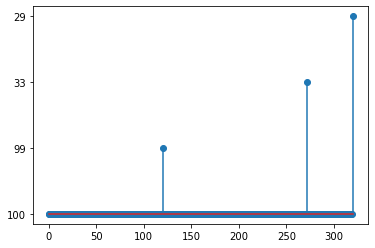

In [9]:
# 3 participants did not complete 100% (99%; 33%; 29%). 
# 99% corresponds to one last confirmation click (all data saved) : keep; remove other two
plt.stem(data_df.Progress, use_line_collection=True)
data_df = data_df[~data_df.Progress.isin(['33','29'])]

### Recode scale data as float

In [10]:
# recode responses as float

print(data_df['1-PR-SE-LE-RE-SM-1'].unique())

vignette_values = {'6':6,
                '4':4,
                '9 - Totalement acceptable':9,
                '5 - Ni acceptable, ni inacceptable':5,
                '2':2,
                '7':7,
                '1 - Totalement inacceptable':1,
                '8':8,
                '3':3
               }
for col in col_self_vignettes + col_other_vignettes:     
    data_df[col] = data_df[col].apply(lambda row: vignette_values[row] if pd.notnull(row) else row)
    


[nan '6' '4' '9 - Totalement acceptable'
 '5 - Ni acceptable, ni inacceptable' '2' '7'
 '1 - Totalement inacceptable' '8' '3']


In [11]:
print(data_df['NN-1'].unique())
print(data_df['NN-4'].unique())

MFQ_values = {'4':4,
              "5 - Extrêmement pertinent (C'est un des facteurs les plus importants lorsque je juge le bien et le mal)":5,
                '3':3,
                "1 - Pas du tout pertinent (Cette considération n'a rien à voir avec mon jugement du bien ou de mal)":1,
                '2':2,
                "5 - Fortement d'accord":5,
                '1 - Fortement en désaccord':1                
               }
for col in col_MFQ:    
    data_df[col] = data_df[col].apply(lambda row: MFQ_values[row] if pd.notnull(row) else row)

['4'
 "5 - Extrêmement pertinent (C'est un des facteurs les plus importants lorsque je juge le bien et le mal)"
 '3'
 "1 - Pas du tout pertinent (Cette considération n'a rien à voir avec mon jugement du bien ou de mal)"
 '2']
['4' '3' "5 - Fortement d'accord" '2' '1 - Fortement en désaccord']


In [12]:
print(data_df['SF1'].unique())

SF_values = {"Ni d'accord, ni pas d'accord":5,
             '8':8,
             "9 - Fortement d'accord":9,
             '2':2,
             '6':6,
             '1 - Fortement en désaccord':1,
             '7':7,
             '4':4,
             '3':3}

for col in col_SF: 
    data_df[col] = data_df[col].apply(lambda row: SF_values[row] if pd.notnull(row) else row)
    

["9 - Fortement d'accord" '8' '7' '2' "Ni d'accord, ni pas d'accord" '6'
 '4' '1 - Fortement en désaccord' '3']


### Melt & pivot conditions

Qualtrics raw data lists vignettes as columns, each with a name coding conditions separated by dashes, ex. 

<table>
<thead>
  <tr>
    <th>subj</th>
    <th>1-PRO-SE-LE-RE-SM</th>
    <th>1-PRO-SE-LE-RE-AN</th>
    <th>...</th>
    <th>2-PRO-SE-LE-EN-SM</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>1</td>
    <td>4.5</td>
    <td>3.2</td>
    <td>...</td>
    <td>5.8</td>
  </tr>
</tbody>
</table>

We pivot this data in long format, to list conditions as columns: 

<table>
<thead>
  <tr>
    <th>subj</th>
    <th>vignette</th>
    <th>prosthesis_software</th>
    <th>self_other</th>
    <th>left_right_fb</th>
    <th>repair_enhance</th>
    <th>smile_anxiety_anger</th>
    <th>DV</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>1</td>
    <td>1</td>
    <th>PRO</th>
    <th>SE</th>
    <th>LE</th>
    <th>RE</th>
    <th>SM</th>  
    <th>4.5</th>        
  </tr>
    <tr>
    <td>1</td>
    <td>1</td>
    <th>PRO</th>
    <th>SE</th>
    <th>LE</th>
    <th>RE</th>
    <th>AN</th>  
    <th>3.2</th>        
  </tr>
    <tr>
    <td>1</td>
    <td>2</td>
    <th>PRO</th>
    <th>SE</th>
    <th>LE</th>
    <th>EN</th>
    <th>SM</th>  
    <th>5.8</th>        
  </tr>
</tbody>
</table>



In [13]:
# melt conditions
data_df = pd.melt(data_df, 
        id_vars=col_demographics+col_MFQ+col_SF,
        value_vars=col_self_vignettes+col_other_vignettes,
        var_name='condition')
# extract main condition from values
data_df['vignette']=data_df['condition'].apply(lambda row: int(row.split('-')[0]))
data_df['prosthesis_software']=data_df['condition'].apply(lambda row: row.split('-')[1])
data_df['self_other']=data_df['condition'].apply(lambda row: row.split('-')[2])
data_df['left_right_fb']=data_df['condition'].apply(lambda row: row.split('-')[3])
data_df['repair_enhance']=data_df['condition'].apply(lambda row: row.split('-')[4])
data_df['smile_anxiety_anger']=data_df['condition'].apply(lambda row: row.split('-')[5])
question_rename = {'1':'acceptable', # is the situation morally acceptable
             '2':'covert_non_instrumente', # is it ok to lie to the person who doesn't have the prosthesis 
             '3':'covert_instrumente'} # is it ok to lie to the person having the prosthesis
data_df['question']=data_df['condition'].apply(lambda row: question_rename[row.split('-')[6]])

data_df = data_df.pivot_table(index=col_demographics+col_MFQ+col_SF+['vignette','prosthesis_software', 'self_other', 'left_right_fb', 'repair_enhance', 'smile_anxiety_anger'],
                    columns=['question'], values = 'value', aggfunc = 'first', dropna = True).reset_index()



### Add vignette text to each data point

Vignette text is stored in first row of raw data file; collect it and store in each line. 

In [14]:
female_df = pd.read_csv('data/femmes.csv')
# select first row
vignettes = female_df[female_df.id=='id']
# get vignette number by melting condition
vignettes = pd.melt(vignettes, 
        id_vars=['id'],
        value_vars=col_self_vignettes+col_other_vignettes,
        var_name='condition')
vignettes['id_vignette'] = vignettes['condition'].apply(lambda x: int(x.split('-')[0]))
vignettes['question'] = vignettes['condition'].apply(lambda x: x.split('-')[6])
# clean 
vignettes = vignettes[vignettes.question=='1'].drop(columns=['id','condition','question']) \
            .rename(columns={'value':'text'}).reset_index(drop=True)
# trim text
vignettes['text'] = vignettes['text'].apply(lambda x: x.split('\n\n\n\n')[0])

# merge with data
data_df = pd.merge(left=data_df, left_on='vignette',
         right=vignettes, right_on='id_vignette')


### Clean up column names

In [15]:
data_df = data_df.rename(columns={'Duration (in seconds)':'duration',
                                  'StartDate':'start_date',
                                  'Status':'status',
                                  'Progress':'progress',
                                  'Q121':'medical_background',
                                  'academic background':'academic_background'})

### Group MFQ and SF items

In [16]:
# cronbach alpha

constructs_df = data_df.groupby(['id'])[col_MFQ+col_SF].mean().reset_index()

print('N: %d'%constructs_df.id.nunique())
print("NN : alpha = %.2f %s"%pg.cronbach_alpha(data=constructs_df[['NN-1','NN-2','NN-3','NN-4','NN-5','NN-6']]))
print("EQ : alpha = %.2f %s"%pg.cronbach_alpha(data=constructs_df[['EQ-1','EQ-2','EQ-3','EQ-4','EQ-5']]))
print('LO : alpha = %.2f %s'%pg.cronbach_alpha(data=constructs_df[['LO-1','LO-2','LO-3','LO-4','LO-5','LO-6']]))
print('AU : alpha = %.2f %s'%pg.cronbach_alpha(data=constructs_df[['AU-1','AU-2','AU-3','AU-4','AU-6']]))
print('PU : alpha = %.2f %s'%pg.cronbach_alpha(data=constructs_df[['PU-1','PU-2','PU-3','PU-4','PU-5','PU-6']]))
print('SF : alpha = %.2f %s'%pg.cronbach_alpha(data=constructs_df[['SF1','SF2','SF3','SF4','SF5',
                                             'SF6','SF7','SF8','SF9','SF10',
                                            'SF11','SF12']]))


N: 308
NN : alpha = 0.54 [0.461 0.619]
EQ : alpha = 0.66 [0.591 0.713]
LO : alpha = 0.64 [0.577 0.701]
AU : alpha = 0.69 [0.627 0.738]
PU : alpha = 0.75 [0.707 0.793]
SF : alpha = 0.90 [0.878 0.912]


In [17]:
# MFQ and SFH items are all positive factors (ie. none reverse-coded)
# Métayer, S., & Pahlavan, F. (2014). Validation of the Moral Foundations Questionnaire in French. Revue internationale de psychologie sociale, 27(2), 79-107.

data_df['MFQ_NN'] = data_df['NN-1'] + data_df['NN-2'] + data_df['NN-3'] \
                    + data_df['NN-4'] + data_df['NN-5'] + data_df['NN-6']


data_df['MFQ_EQ'] = data_df['EQ-1'] + data_df['EQ-2'] + data_df['EQ-3'] \
                    + data_df['EQ-4'] + data_df['EQ-5'] #EQ-6 removed from MFQ-French (Métayer 2014)


data_df['MFQ_LO'] = data_df['LO-1'] + data_df['LO-2'] + data_df['LO-3'] \
                    + data_df['LO-4'] + data_df['LO-5'] + data_df['LO-6']


data_df['MFQ_AU'] = data_df['AU-1'] + data_df['AU-2'] + data_df['AU-3'] \
                    + data_df['AU-4'] + data_df['AU-6'] #AU-5 removed from MFQ-French (Métayer 2014)


data_df['MFQ_PU'] = data_df['PU-1'] + data_df['PU-2'] + data_df['PU-3'] \
                    + data_df['PU-4'] + data_df['PU-5'] + data_df['PU-6']


data_df['SF'] = data_df['SF1'] + data_df['SF2'] + data_df['SF3'] \
                    + data_df['SF4'] + data_df['SF5'] + data_df['SF6'] \
                    + data_df['SF7'] + data_df['SF8'] + data_df['SF9'] \
                    + data_df['SF10'] + data_df['SF11'] + data_df['SF12']



In [18]:
# Remove participants for whom DE-1 > DE-2
# cf. "Les auteurs conseillent de ne pas prendre en compte les participants pour lesquels être bon en math est plus important que faire le bien
# Métayer & Pahlavan, 2014
print("decoy participants: "+str(data_df[data_df['DE-1']>data_df['DE-2']].id.nunique()))
data_df = data_df[data_df['DE-1']<data_df['DE-2']]

decoy participants: 2


In [19]:
data_df = data_df.drop(columns=col_MFQ+col_SF+['id_vignette'])

### New condition categories

Whether vignettes manipulate the participant's voice or the voice heard by the participant depends on the combination of conditions (self/other, and left_right_fb). We recode these conditions accordingly. 

In [20]:
# whose voice is transformed
transformed_voice = {'SE-LE':'participant', # participant wears a voice changer
                     'SE-RI':'other', # participant wears an ear prosthesis
                     'SE-FB':'participant', # participant wears a voice changer
                     'OT-LE':'other', # other wears a voice changer
                     'OT-RI':'participant', # other wears an ear prosthesis
                     'OT-FB':'other'} # other wears a voice changer

data_df['code'] = data_df['self_other']+'-'+data_df['left_right_fb']

data_df['transformed_voice'] = data_df.code.apply(lambda x: transformed_voice[x]) 


In [21]:
# whose perception is manipulated (who's hearing the transformed voice)
manipulated_perception = {'SE-LE':'other',
                          'SE-RI':'participant',
                          'SE-FB':'participant',
                          'OT-LE':'participant',
                          'OT-RI':'other',
                          'OT-FB':'other'}

data_df['manipulated_perception'] = data_df.code.apply(lambda x: manipulated_perception[x]) 

In [22]:
data_df = data_df.drop(columns=['code'])

In [23]:
# who wears the prosthesis
instrumente = {'SE':'participant',
               'OT':'other'}
data_df['instrumente'] = data_df.self_other.apply(lambda x: instrumente[x]) 

In [24]:
# add a new condition which groups negative transforms (i.e. which operate on negative emotions, by making them less negative) under the "NEG" condition
# making them the same nb of vignette as SMI (which is termed POS)
data_df.groupby(['smile_anxiety_anger']).vignette.nunique()
transformation_values={'SM':'POS',
                       'AN':'NEG',
                       'CO':'NEG'}
data_df['transformation'] = data_df['smile_anxiety_anger'].apply(lambda x : transformation_values[x])


In [25]:
# save in separate df if needed (2 lines per id,vignette)
data_df.drop(columns=['covert_instrumente','covert_non_instrumente']).to_csv('data/data_acceptable.csv')

### Covert conditions

The study includes two DVs: (1) whether the situation is acceptable, and (2) whether it is acceptable to conceal the use of the device in that situation. DV2 (covert use) is collected in the survey as two separate questions (is it acceptable to lie to the person using the device; vs to lie to others about the device). Here, we code these two questions as a single DV (covert), linked to two conditions (either covert_instrument = yes/no, or covert_person = participant/other)

In [26]:
# judgements about lying to the covert_instrumente (instrumente/non_instrumente) are in covert_instrumente_judgement
col_covert = ['covert_instrumente', 'covert_non_instrumente']
columns = list(data_df.columns)
for col in col_covert: 
    columns.remove(col)
covert_instrumente_data=pd.melt(data_df,
                id_vars=columns,
                value_vars=col_covert,
                var_name='covert_instrumente',
                value_name='covert_instrumente_judgement')
covert_instrumente_data.covert_instrumente = covert_instrumente_data.covert_instrumente.apply(lambda x: x.split('_')[1])


In [27]:
# save in separate df if needed (2 lines per id,vignette)
#covert_instrumente_data.drop(columns=['acceptable']).to_csv('data/data_covert_instrumente.csv')

In [28]:
# morality of lying to the participant
data_df.loc[data_df.self_other=='SE', 
            'covert_participant'] = data_df['covert_instrumente']
data_df.loc[data_df.self_other=='OT', 
            'covert_participant'] = data_df['covert_non_instrumente']

#  morality of lying to the other
data_df.loc[data_df.self_other=='SE', 
            'covert_other'] = data_df['covert_non_instrumente']
data_df.loc[data_df.self_other=='OT', 
            'covert_other'] = data_df['covert_instrumente']

data_df=data_df.drop(columns=['covert_instrumente','covert_non_instrumente'])

In [29]:
# judgements about lying to the covert_person (participant/other) are in covert_person_judgement
col_covert = ['covert_participant', 'covert_other']
columns = list(data_df.columns)
for col in col_covert: 
    columns.remove(col)
covert_person_data=pd.melt(data_df,
                id_vars=columns,
                value_vars=col_covert,
                var_name='covert_person',
                value_name='covert_person_judgement')
covert_person_data.covert_person = covert_person_data.covert_person.apply(lambda x: x.split('_')[1])

In [30]:
# save in separate df if needed (2 lines per id,vignette)
covert_person_data.drop(columns=['acceptable']).to_csv('data/data_covert_person.csv')

In [31]:
# make a single df with 2 lines per id, vignette
data_df = pd.merge(left=covert_person_data,
         left_index=True,
         right=covert_instrumente_data[['covert_instrumente','covert_instrumente_judgement']],
         right_index=True).sort_values(by=['id','vignette'])

Prepared data is stored into a single csv file, which is used for all subsequent analysis

In [32]:
data_df.to_csv('data/data.csv')

## Demographics

In [33]:
data_df = pd.read_csv('data/data.csv', index_col=0)

In [34]:
# recode age as float
print(data_df.age.unique())
age_values = {'26 ans':26,
                '25 ANS':25,
                '22 ans':22,
                '21 ans':21,
                '18 ans':18}
data_df.age = data_df.age.apply(lambda value: age_values[value] if value in age_values else float(value))
    

['24' '22' '23' '28' '30' '26' '35' '21' '31' '25' '27' '29' '26 ans' '50'
 '43' '20' '54' '18' '52' '36' '25 ANS' '22 ans' '41' '33' '44' '19' '32'
 '20 ' '23 ' '55' '34' '21 ans' '40' '18 ans' '38' '39' '75' '46' '57']


In [35]:
data_df.groupby(['id']).age.mean().describe()

count    303.000000
mean      25.755776
std        7.436247
min       18.000000
25%       21.000000
50%       24.000000
75%       28.000000
max       75.000000
Name: age, dtype: float64

In [36]:
data_df.groupby(['self_other']).id.nunique()

self_other
OT    153
SE    150
Name: id, dtype: int64

In [37]:
data_df.groupby(['medical_background']).id.nunique()

medical_background
non    276
oui     27
Name: id, dtype: int64

In [38]:
data_df.groupby(['academic_background']).id.nunique()

academic_background
Bac + 1                                     23
Bac + 2, diplôme de BTS, DUT, DEUST ...     34
Bac + 3 : Licence                           97
Bac + 5 : Master                           115
Brevet des collèges                          2
Diplôme de baccalauréat                     31
Doctorat                                     1
Name: id, dtype: int64

## Results

### Acceptability of overtly using the technology

#### Voice transformations are in general well accepted in the population

Across all situations, mean acceptability M=6.49

M=6.49


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,14.647582,302,two-sided,4.479723e-37,"[6.29, 6.69]",0.841482,5.572e+33,1.0


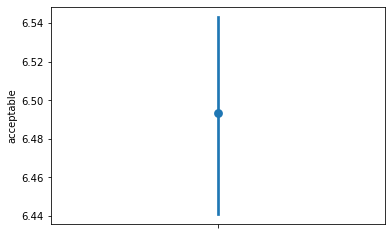

In [39]:
sns.pointplot(data=data_df, 
             y='acceptable')
print('M=%.2f'%data_df.acceptable.mean())
pg.ttest(data_df.groupby(['id']).acceptable.mean(),5)

Association with MFQ/SFH

Heteroscedasticity:
F(6,296)=3.24, p=0.0043

                    Robust linear Model Regression Results                    
Dep. Variable:             acceptable   No. Observations:                  303
Model:                            RLM   Df Residuals:                      296
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H3                                         
Date:                Wed, 30 Jun 2021                                         
Time:                        05:55:01                                         
No. Iterations:                    22                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const  

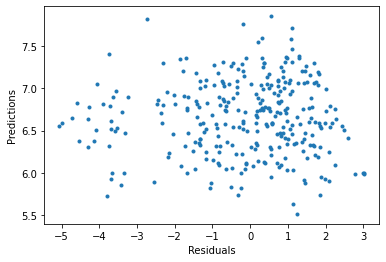

In [40]:
factors = ['MFQ_NN', 'MFQ_EQ', 'MFQ_LO', 'MFQ_AU', 'MFQ_PU', 'SF']

agg_dict = {factor:'first' for factor in factors}
agg_dict.update({'acceptable':'mean'})
a = data_df.groupby(['id']).agg(agg_dict).reset_index()

# Robust linear regression ()
x_fit = sm.add_constant(a[factors])
rlm_model = sm.RLM(a.acceptable,
                   x_fit,
                   M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit(cov='H3')

# homoscedasticity
bp = sm.stats.diagnostic.het_breuschpagan(rlm_results.resid, rlm_results.model.exog)
print('Heteroscedasticity:\nF(%d,%d)=%.2f, p=%.4f\n'%(rlm_results.df_model,
                               rlm_results.df_resid,
                               bp[2],bp[3]))

plt.plot(rlm_results.resid, rlm_results.fittedvalues,'.')
plt.xlabel('Residuals')
plt.ylabel('Predictions')

print(rlm_results.summary())


Text(16.424999999999997, 0.5, 'Acceptability of overt use')

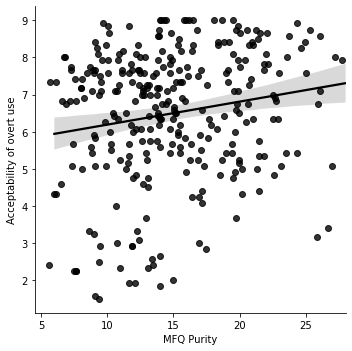

In [41]:
axs=sns.lmplot(x="MFQ_PU", 
           y="acceptable",               
               scatter_kws={"color":'k'},
               line_kws={"color":'k'},
               x_jitter=0.5,
              data= a)
plt.xlabel('MFQ Purity')
plt.ylabel('Acceptability of overt use')


Text(16.424999999999997, 0.5, 'Acceptability of overt use')

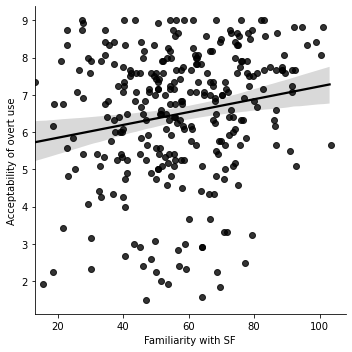

In [42]:
axs=sns.lmplot(x="SF", 
           y="acceptable",
               x_jitter=0.5,
               scatter_kws={"color":'k'},
               line_kws={"color":'k'},
               #hue='repair_enhance',
           data=a)
plt.xlabel('Familiarity with SF')
plt.ylabel('Acceptability of overt use')
#plt.legend(title='Who wears the device')

#### A therapeutic context makes them even more acceptable


ANOVA SUMMARY

Source            ddof1    ddof2       F    p-unc    np2    eps
--------------  -------  -------  ------  -------  -----  -----
repair_enhance        1      302  47.069    0.000  0.135  1.000



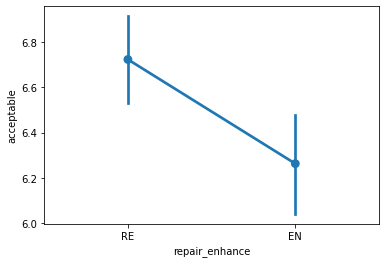

In [43]:
sns.pointplot(data=data_df, 
            x='repair_enhance',
            y='acceptable',
            units='id',
            ci=95,
            dodge=True)
# RM-ANOVA
aov = pg.rm_anova(data=data_df.groupby(['id','repair_enhance']).agg({'acceptable':'mean'}).reset_index(),
                  dv='acceptable',
                  within=['repair_enhance'],
                  subject='id')
pg.print_table(aov)

Heteroscedasticity:
F(6,296)=0.39, p=0.8836

                            OLS Regression Results                            
Dep. Variable:        acceptable_norm   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3758
Date:                Wed, 30 Jun 2021   Prob (F-statistic):              0.894
Time:                        05:55:10   Log-Likelihood:                -475.01
No. Observations:                 303   AIC:                             964.0
Df Residuals:                     296   BIC:                             990.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

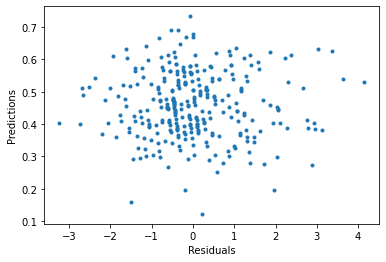

In [44]:
factors = ['MFQ_NN', 'MFQ_EQ', 'MFQ_LO', 'MFQ_AU', 'MFQ_PU', 'SF']

# compute the difference of acceptability scores averaged over both types of vignettes
agg_dict = {factor:'first' for factor in factors}
agg_dict.update({'acceptable':'mean'})
a = data_df.groupby(['id','repair_enhance']).agg(agg_dict).reset_index()
enhance_ratings = a[a.repair_enhance=="EN"][['id','acceptable']].set_index("id")
enhance_ratings.rename(columns={'acceptable':'enhance'}, inplace=True)
a=a.join(enhance_ratings, on='id')
a['acceptable_norm'] = a.acceptable - a.enhance


# Robust linear regression ()
x_fit = sm.add_constant(a[a.repair_enhance=='RE'][factors])
rlm_model = sm.OLS(a[a.repair_enhance=='RE'].acceptable_norm, x_fit)
rlm_results = rlm_model.fit()

# homoscedasticity
bp = sm.stats.diagnostic.het_breuschpagan(rlm_results.resid, rlm_results.model.exog)
print('Heteroscedasticity:\nF(%d,%d)=%.2f, p=%.4f\n'%(rlm_results.df_model,
                               rlm_results.df_resid,
                               bp[2],bp[3]))

plt.plot(rlm_results.resid, rlm_results.fittedvalues,'.')
plt.xlabel('Residuals')
plt.ylabel('Predictions')

print(rlm_results.summary())


#### Manipulating perception is less acceptable than manipulating production


ANOVA SUMMARY

Source           ddof1    ddof2      F    p-unc    np2    eps
-------------  -------  -------  -----  -------  -----  -----
left_right_fb        2      604  7.518    0.001  0.024  0.989


POST HOC TESTS

Contrast       A    B    Paired    Parametric         T      dof  Tail         p-unc    p-corr  p-adjust      BF10    cohen
-------------  ---  ---  --------  ------------  ------  -------  ---------  -------  --------  ----------  ------  -------
left_right_fb  FB   LE   True      True          -2.983  302.000  two-sided    0.003     0.009  bonf         4.955   -0.108
left_right_fb  FB   RI   True      True           0.418  302.000  two-sided    0.676     1.000  bonf         0.070    0.014
left_right_fb  LE   RI   True      True           3.659  302.000  two-sided    0.000     0.001  bonf        42.400    0.122



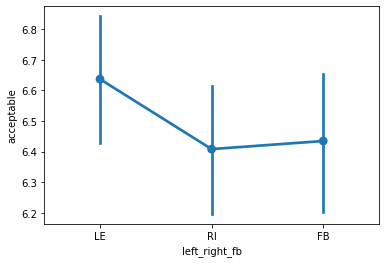

In [45]:
sns.pointplot(data=data_df, 
            x='left_right_fb',
            y='acceptable',
            units='id',
            ci=95,
            dodge=True)
# RM-ANOVA
aov = pg.rm_anova(data=data_df.groupby(['id','left_right_fb']).agg({'acceptable':'mean'}).reset_index(),
                  dv='acceptable',
                  within=['left_right_fb'],
                  subject='id')
pg.print_table(aov)

# bonf-corrected post hocs
posthoc = pg.pairwise_ttests(data=data_df.groupby(['id','left_right_fb']).agg({'acceptable':'mean'}).reset_index(),
                  dv='acceptable',
                  within=['left_right_fb'],
                  subject='id',
                             parametric=True,
                             padjust='bonf',
                             effsize='cohen')
pg.print_table(posthoc, floatfmt='.3f')

RI
Heteroscedasticity:
F(6,296)=0.27, p=0.9499

                            OLS Regression Results                            
Dep. Variable:        acceptable_norm   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.3113
Date:                Wed, 30 Jun 2021   Prob (F-statistic):              0.931
Time:                        05:55:22   Log-Likelihood:                -453.83
No. Observations:                 303   AIC:                             921.7
Df Residuals:                     296   BIC:                             947.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

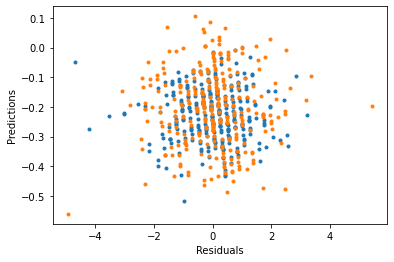

In [46]:
factors = ['MFQ_NN', 'MFQ_EQ', 'MFQ_LO', 'MFQ_AU', 'MFQ_PU', 'SF']

# normalize right (perception) and FB against LE (perception)
agg_dict = {factor:'first' for factor in factors}
agg_dict.update({'acceptable':'mean'})
a = data_df.groupby(['id','left_right_fb']).agg(agg_dict).reset_index()
left_ratings = a[a.left_right_fb=="LE"][['id','acceptable']].set_index("id")
left_ratings.rename(columns={'acceptable':'left'}, inplace=True)
a=a.join(left_ratings, on='id')
a['acceptable_norm'] = a.acceptable - a.left

for situation in ['RI','FB']: 
    print(situation)
    x_fit = sm.add_constant(a[a.left_right_fb==situation][factors])
    rlm_model = sm.OLS(a[a.left_right_fb==situation].acceptable_norm, x_fit)
    rlm_results = rlm_model.fit()

    #rlm_model = sm.api.RLM(a.acceptable_norm,
    #               x_fit,
    #               M=sm.api.robust.norms.HuberT())
    #rlm_results = rlm_model.fit(cov='H3')
    
    # homoscedasticity
    bp = sm.stats.diagnostic.het_breuschpagan(rlm_results.resid, rlm_results.model.exog)
    print('Heteroscedasticity:\nF(%d,%d)=%.2f, p=%.4f\n'%(rlm_results.df_model,
                               rlm_results.df_resid,
                               bp[2],bp[3]))

    plt.plot(rlm_results.resid, rlm_results.fittedvalues,'.')
    plt.xlabel('Residuals')
    plt.ylabel('Predictions')

    print(rlm_results.summary())

### Acceptability of covert uses

#### Using the transformation covertly is not a problem...

More acceptable situations were more acceptable to lie about

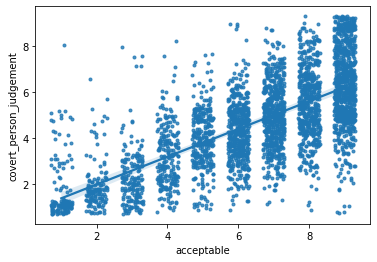

In [47]:
# correlation over vignette & users
a = data_df.groupby(['vignette','id']).agg({'acceptable':'mean',
                                           'covert_person_judgement':'mean'}).reset_index()
sns.regplot(data=a,
            x='acceptable',
            y='covert_person_judgement',
            units='id',
            x_jitter=0.3,
            y_jitter=0.3,
            marker='.')

Heteroscedasticity:
F(1,22)=0.13, p=0.7262

                                 OLS Regression Results                                 
Dep. Variable:     covert_instrumente_judgement   R-squared:                       0.611
Model:                                      OLS   Adj. R-squared:                  0.594
Method:                           Least Squares   F-statistic:                     34.61
Date:                          Wed, 30 Jun 2021   Prob (F-statistic):           6.41e-06
Time:                                  05:55:28   Log-Likelihood:                 18.825
No. Observations:                            24   AIC:                            -33.65
Df Residuals:                                22   BIC:                            -31.29
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025

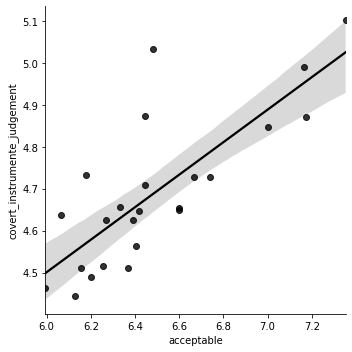

In [48]:
# correlation over vignettes, averaged over users
a=data_df.groupby(['vignette']).agg({'acceptable':'mean',
                                                    'covert_instrumente_judgement':'mean'}).reset_index()

sns.lmplot(data=a,
            x='acceptable',
            y='covert_instrumente_judgement',
          scatter_kws={"color":'k'},
               line_kws={"color":'k'})

x_fit = sm.add_constant(a.acceptable)
rlm_model = sm.OLS(a.covert_instrumente_judgement, x_fit)
rlm_results = rlm_model.fit()

    #rlm_model = sm.api.RLM(a.acceptable_norm,
    #               x_fit,
    #               M=sm.api.robust.norms.HuberT())
    #rlm_results = rlm_model.fit(cov='H3')
    
# homoscedasticity
bp = sm.stats.diagnostic.het_breuschpagan(rlm_results.resid, rlm_results.model.exog)
print('Heteroscedasticity:\nF(%d,%d)=%.2f, p=%.4f\n'%(rlm_results.df_model,
                               rlm_results.df_resid,
                               bp[2],bp[3]))

#plt.plot(rlm_results.resid, rlm_results.fittedvalues,'.')
#plt.xlabel('Residuals')
#plt.ylabel('Predictions')
print(rlm_results.summary())

Across all situations, mean acceptability M=4.69

M=4.69


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-3.191524,302,two-sided,0.001564,"[4.5, 4.88]",0.183348,9.205,0.889032


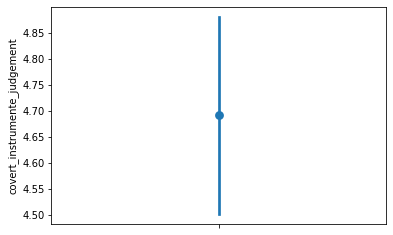

In [49]:
sns.pointplot(data=data_df.groupby(['id']).covert_instrumente_judgement.mean().reset_index(), 
             y='covert_instrumente_judgement')
print('M=%.2f'%data_df.covert_instrumente_judgement.mean())
pg.ttest(data_df.groupby(['id']).covert_instrumente_judgement.mean(),5)

Heteroscedasticity:
F(6,296)=1.27, p=0.2699

                         Robust linear Model Regression Results                         
Dep. Variable:     covert_instrumente_judgement   No. Observations:                  303
Model:                                      RLM   Df Residuals:                      296
Method:                                    IRLS   Df Model:                            6
Norm:                                    HuberT                                         
Scale Est.:                                 mad                                         
Cov Type:                                    H3                                         
Date:                          Wed, 30 Jun 2021                                         
Time:                                  05:55:28                                         
No. Iterations:                              27                                         
                 coef    std err          z      P>|z|      [0.02

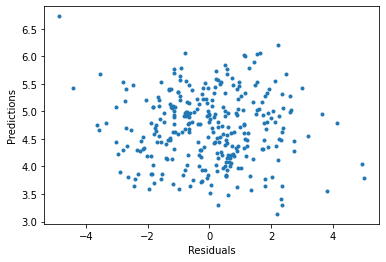

In [50]:
agg_dict = {factor:'first' for factor in factors}
agg_dict.update({'covert_instrumente_judgement':'mean'})
a = data_df.groupby(['id']).agg(agg_dict).reset_index()
x_fit = sm.add_constant(a[factors])
rlm_model = sm.OLS(a.covert_instrumente_judgement, x_fit)
rlm_results = rlm_model.fit()

rlm_model = sm.RLM(a.covert_instrumente_judgement,
               x_fit,
               M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit(cov='H3')
    
# homoscedasticity
bp = sm.stats.diagnostic.het_breuschpagan(rlm_results.resid, rlm_results.model.exog)
print('Heteroscedasticity:\nF(%d,%d)=%.2f, p=%.4f\n'%(rlm_results.df_model,
                               rlm_results.df_resid,
                               bp[2],bp[3]))

plt.plot(rlm_results.resid, rlm_results.fittedvalues,'.')
plt.xlabel('Residuals')
plt.ylabel('Predictions')
print(rlm_results.summary())

Very large interaction with which person is being lied to


ANOVA SUMMARY

Source               SS    DF1    DF2        MS        F    p-unc    np2      eps
-------------  --------  -----  -----  --------  -------  -------  -----  -------
instrumente       1.012      1    301     1.012    0.179    0.673  0.001  nan
covert_person     0.152      1    301     0.152    0.081    0.776  0.000    1.000
Interaction    1173.763      1    301  1173.763  629.946    0.000  0.677  nan


ANOVA SUMMARY

Source                ddof1    ddof2        F    p-unc    np2    eps
------------------  -------  -------  -------  -------  -----  -----
covert_instrumente        1      302  631.237    0.000  0.676  1.000



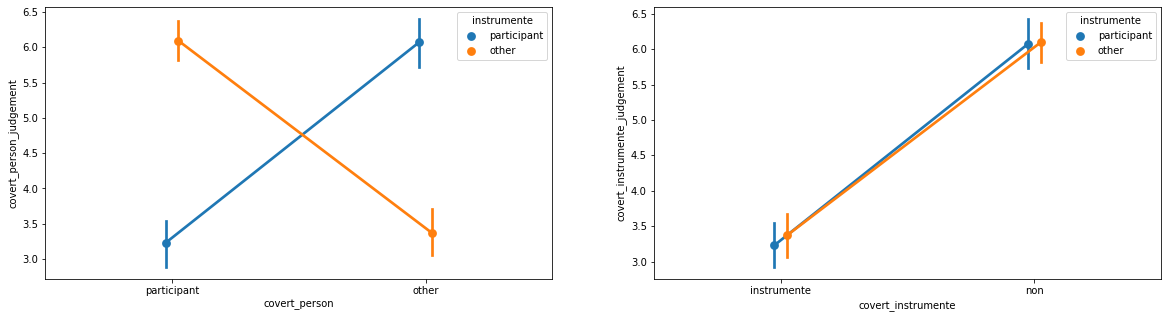

In [51]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
sns.pointplot(data=data_df, 
            x='covert_person',
            y='covert_person_judgement',
            units='id',
            hue='instrumente',
            bootstrap=1000,
            legend_out=False,
            ci=95,
            dodge=True)
plt.subplot(122)
sns.pointplot(data=data_df, 
            x='covert_instrumente',
            y='covert_instrumente_judgement',
            units='id',
            hue='instrumente',
            bootstrap=1000,
            legend_out=False,
            ci=95,
            dodge=True)
aov = pg.mixed_anova(data=data_df,
                     dv='covert_person_judgement',
                     between='instrumente',
                     within='covert_person',
                     subject='id')
pg.print_table(aov)
aov = pg.rm_anova(data=data_df,
                     dv='covert_instrumente_judgement',
                     within='covert_instrumente',
                     subject='id')
pg.print_table(aov)

M=6.08


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,9.998859,302,two-sided,1.607503e-20,"[5.87, 6.3]",0.574419,2.559e+17,1.0


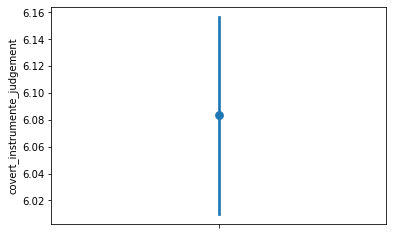

In [52]:
# participants considered it morally acceptable that the user of this device hides its true purpose to others
sns.pointplot(data=data_df[data_df.covert_instrumente=='non'], 
             y='covert_instrumente_judgement')
print('M=%.2f'%data_df[data_df.covert_instrumente=='non'].covert_instrumente_judgement.mean())
pg.ttest(data_df[data_df.covert_instrumente=='non'].groupby(['id']).covert_instrumente_judgement.mean(),5)

Heteroscedasticity:
F(6,296)=1.72, p=0.1150

                         Robust linear Model Regression Results                         
Dep. Variable:     covert_instrumente_judgement   No. Observations:                  303
Model:                                      RLM   Df Residuals:                      296
Method:                                    IRLS   Df Model:                            6
Norm:                                    HuberT                                         
Scale Est.:                                 mad                                         
Cov Type:                                    H3                                         
Date:                          Wed, 30 Jun 2021                                         
Time:                                  05:55:45                                         
No. Iterations:                              17                                         
                 coef    std err          z      P>|z|      [0.02

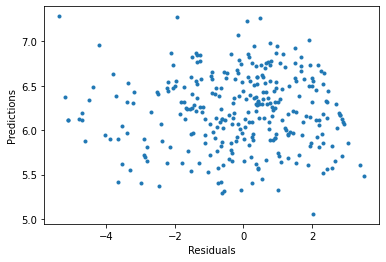

In [53]:
factors = ['MFQ_NN', 'MFQ_EQ', 'MFQ_LO', 'MFQ_AU', 'MFQ_PU', 'SF']

agg_dict = {factor:'first' for factor in factors}
agg_dict.update({'covert_instrumente_judgement':'mean'})
a = data_df[data_df.covert_instrumente=='non'].groupby(['id']).agg(agg_dict).reset_index()
x_fit = sm.add_constant(a[factors])
#rlm_model = sm.OLS(a.covert_instrumente_judgement, x_fit)
#rlm_results = rlm_model.fit()

rlm_model = sm.RLM(a.covert_instrumente_judgement,
               x_fit,
               M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit(cov='H3')
    
# homoscedasticity
bp = sm.stats.diagnostic.het_breuschpagan(rlm_results.resid, rlm_results.model.exog)
print('Heteroscedasticity:\nF(%d,%d)=%.2f, p=%.4f\n'%(rlm_results.df_model,
                               rlm_results.df_resid,
                               bp[2],bp[3]))

plt.plot(rlm_results.resid, rlm_results.fittedvalues,'.')
plt.xlabel('Residuals')
plt.ylabel('Predictions')
print(rlm_results.summary())

Text(16.424999999999997, 0.5, 'Acceptability of lying')

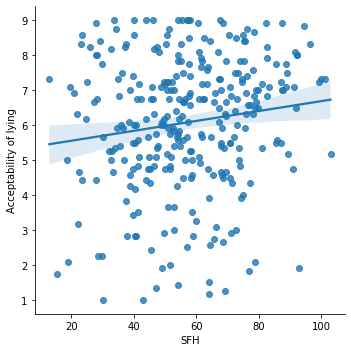

In [54]:
axs=sns.lmplot(x="SF", 
           y="covert_instrumente_judgement",
            x_jitter=0.5,
           data=a)
plt.xlabel('SFH')
plt.ylabel('Acceptability of lying')
#plt.legend(title='Lying to the person wearing the device', 'ob')
#axs.ax.legend(title='Lying to the person wearing the device')
#import matplotlib.lines as mlines
#blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
#                          markersize=10, label='Lying to the person wearing the device')
#plt.legend(handles=[blue_dot])


#### ...unless it is hidden from the user of the device

M=3.30


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-14.90246,302,two-sided,4.985354e-38,"[3.08, 3.53]",0.856124,4.893e+34,1.0


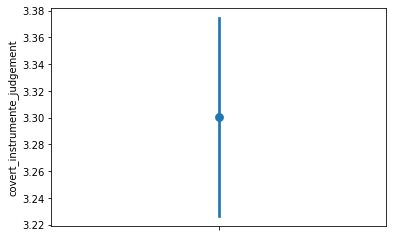

In [55]:
# Mentir aux autres 
sns.pointplot(data=data_df[data_df.covert_instrumente=='instrumente'], 
             y='covert_instrumente_judgement')
print('M=%.2f'%data_df[data_df.covert_instrumente=='instrumente'].covert_instrumente_judgement.mean())
pg.ttest(data_df[data_df.covert_instrumente=='instrumente'].groupby(['id']).covert_instrumente_judgement.mean(),5)

Heteroscedasticity:
F(6,296)=1.28, p=0.2650

                         Robust linear Model Regression Results                         
Dep. Variable:     covert_instrumente_judgement   No. Observations:                  303
Model:                                      RLM   Df Residuals:                      296
Method:                                    IRLS   Df Model:                            6
Norm:                                    HuberT                                         
Scale Est.:                                 mad                                         
Cov Type:                                    H3                                         
Date:                          Wed, 30 Jun 2021                                         
Time:                                  05:58:54                                         
No. Iterations:                              12                                         
                 coef    std err          z      P>|z|      [0.02

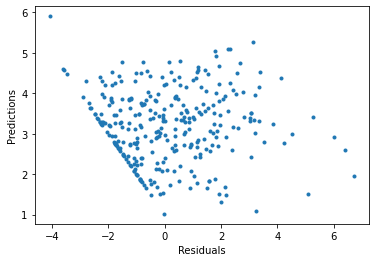

In [72]:
factors = ['MFQ_NN', 'MFQ_EQ', 'MFQ_LO', 'MFQ_AU', 'MFQ_PU', 'SF']

agg_dict = {factor:'first' for factor in factors}
agg_dict.update({'covert_instrumente_judgement':'mean'})
a = data_df[data_df.covert_instrumente=='instrumente'].groupby(['id']).agg(agg_dict).reset_index()
x_fit = sm.add_constant(a[factors])
#rlm_model = sm.OLS(a.covert_instrumente_judgement, x_fit)
#rlm_results = rlm_model.fit()

rlm_model = sm.RLM(a.covert_instrumente_judgement,
               x_fit,
               M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit(cov='H3')
    
# homoscedasticity
bp = sm.stats.diagnostic.het_breuschpagan(rlm_results.resid, rlm_results.model.exog)
print('Heteroscedasticity:\nF(%d,%d)=%.2f, p=%.4f\n'%(rlm_results.df_model,
                               rlm_results.df_resid,
                               bp[2],bp[3]))

plt.plot(rlm_results.resid, rlm_results.fittedvalues,'.')
plt.xlabel('Residuals')
plt.ylabel('Predictions')
print(rlm_results.summary())

(9.0, 26.0)

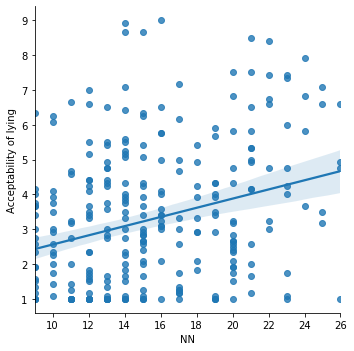

In [93]:
axs=sns.lmplot(x="MFQ_PU", 
           y="covert_instrumente_judgement",
            #x_jitter=0.1,
           data=a,
              robust=True)
plt.xlabel('NN')
plt.ylabel('Acceptability of lying')
plt.xlim([9,26])
#plt.legend(title='Lying to the person wearing the device', 'ob')
#axs.ax.legend(title='Lying to the person wearing the device')
#import matplotlib.lines as mlines
#blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
#                          markersize=10, label='Lying to the person wearing the device')
#plt.legend(handles=[blue_dot])


### Acceptability of voice transformations is not influenced by seeking self profits

There was no statistical difference of acceptability between overt situations which depicted the participant as the user benefiting of the device (M=6.43), and situations where the user was an unknown person (M=6.55)

In [58]:
data_df.groupby(['instrumente']).agg({'acceptable':'mean'})

,acceptable
instrumente,
other,6.555011
participant,6.430556



ANOVA SUMMARY

Source         ddof1    ddof2      F    p-unc    np2
-----------  -------  -------  -----  -------  -----
instrumente        1      301  0.372    0.543  0.001



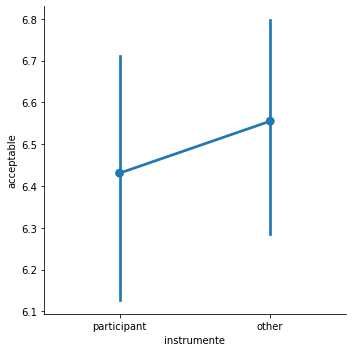

In [59]:
sns.catplot(data=data_df, 
            kind='point',
            x='instrumente',
            y='acceptable',
            units='id',
            bootstrap=1000,
            ci=95,
            dodge=True)

aov = pg.anova(data=data_df.groupby(['id']).agg({'acceptable':'mean',
                                                'instrumente':'first'}).reset_index(),
               dv='acceptable',
               between=['instrumente'])
pg.print_table(aov)

Neither did the effect of self/other interact with any of the other variables: regardless of whether the user was themselves or others, participants thought similarly of differences between situations meant to repair and enhance (F(1,201)=1.68, p=.20), of differences between situations involving smiling, anger or anxiety (F(1,201)=1.43, p=.23), and of differences between devices affecting the user's production, perception or feedback (F(2,602)=2.32, p=.099).

In [60]:
aov = pg.mixed_anova(dv='acceptable',
                     between='instrumente',
                     within='repair_enhance',
                     subject='id',
                     data=data_df)
pg.print_table(aov)


ANOVA SUMMARY

Source              SS    DF1    DF2      MS       F    p-unc    np2      eps
--------------  ------  -----  -----  ------  ------  -------  -----  -------
instrumente      2.346      1    301   2.346   0.372    0.543  0.001  nan
repair_enhance  32.036      1    301  32.036  47.175    0.000  0.135    1.000
Interaction      1.140      1    301   1.140   1.679    0.196  0.006  nan



In [61]:
aov = pg.mixed_anova(dv='acceptable',
                     between='instrumente',
                     within='left_right_fb',
                     subject='id',
                     data=data_df)
pg.print_table(aov)


ANOVA SUMMARY

Source            SS    DF1    DF2     MS      F    p-unc    np2      eps
-------------  -----  -----  -----  -----  -----  -------  -----  -------
instrumente    3.520      1    301  3.520  0.372    0.543  0.001  nan
left_right_fb  9.473      2    602  4.737  7.495    0.001  0.024    0.989
Interaction    0.059      2    602  0.029  0.047    0.955  0.000  nan



In [62]:
aov = pg.mixed_anova(dv='acceptable',
                     between='instrumente',
                     within='transformation',
                     subject='id',
                     data=data_df)
pg.print_table(aov)


ANOVA SUMMARY

Source              SS    DF1    DF2      MS       F    p-unc    np2      eps
--------------  ------  -----  -----  ------  ------  -------  -----  -------
instrumente      2.346      1    301   2.346   0.372    0.543  0.001  nan
transformation  18.425      1    301  18.425  55.115    0.000  0.155    1.000
Interaction      0.480      1    301   0.480   1.434    0.232  0.005  nan



Similarly, participants did not judge less acceptable the covert situations where they were hidden the true purpose of the device (regardless of whether they were its user, or not), compared to situations where it was hidden to unknown others (F(1,302)=0.0026, p=.87


ANOVA SUMMARY

Source           ddof1    ddof2      F    p-unc    np2    eps
-------------  -------  -------  -----  -------  -----  -----
covert_person        1      302  0.026    0.871  0.000  1.000



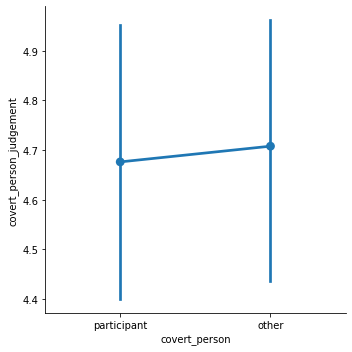

In [63]:
sns.catplot(data=data_df, 
            kind='point',
            x='covert_person',
            y='covert_person_judgement',
            units='id',
#            hue='instrumente',
            bootstrap=1000,
            ci=95,
            dodge=True)
aov = pg.rm_anova(data=data_df.groupby(['id', 'covert_person']).agg({'covert_person_judgement':'mean'}).reset_index(),
                  dv='covert_person_judgement',
                  within='covert_person',
                  subject='id')
pg.print_table(aov)

### The nature of the emotion impacts the moral acceptability of the transformation

Situations in which transformations aimed at weakening the two negative emotions of anxiety (M=6.8) or anger (M=6.5) were better accepted than situations involving transformations enhancing smile


ANOVA SUMMARY

Source                               SS    ddof1    ddof2      MS       F    p-unc    p-GG-corr    np2    eps
-------------------------------  ------  -------  -------  ------  ------  -------  -----------  -----  -----
transformation                   36.850        1      302  36.850  55.036    0.000        0.000  0.154  1.000
repair_enhance                   64.072        1      302  64.072  47.069    0.000        0.000  0.135  1.000
transformation * repair_enhance   3.667        1      302   3.667   6.948    0.009        0.009  0.022  1.000



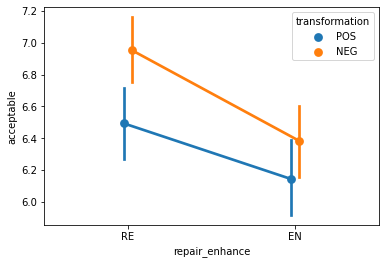

In [64]:
sns.pointplot(data=data_df, 
            x='repair_enhance',
            y='acceptable',
            hue='transformation',
            units='id',
            ci=95,
            dodge=True)
# RM-ANOVA
aov = pg.rm_anova(data=data_df.groupby(['id', 'transformation', 'repair_enhance']).agg({'acceptable':'mean'}).reset_index(),
                  dv='acceptable',
                  within=['transformation','repair_enhance'],
                  subject='id')
pg.print_table(aov)


ANOVA SUMMARY

Source                                    SS    ddof1    ddof2      MS       F    p-unc    p-GG-corr    np2    eps
------------------------------------  ------  -------  -------  ------  ------  -------  -----------  -----  -----
smile_anxiety_anger                   59.539        2      604  29.769  24.479    0.000        0.000  0.075  0.919
repair_enhance                        76.324        1      302  76.324  34.851    0.000        0.000  0.103  1.000
smile_anxiety_anger * repair_enhance  46.966        2      604  23.483  21.314    0.000        0.000  0.066  0.871



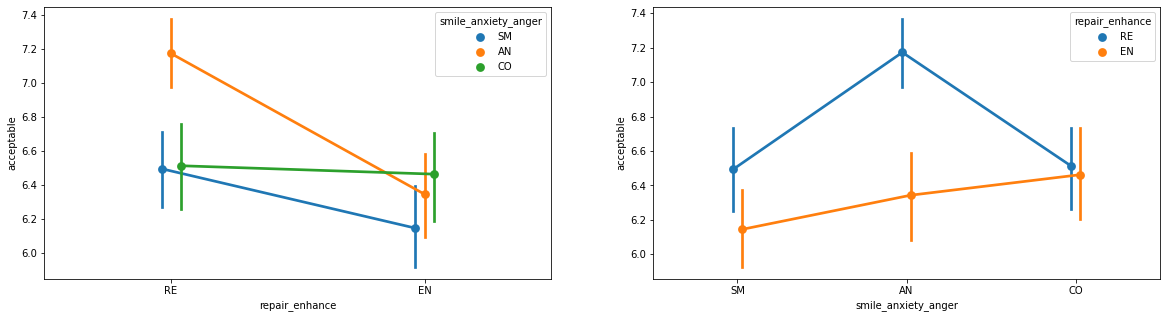

In [65]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
sns.pointplot(data=data_df, 
            x='repair_enhance',
            y='acceptable',
            hue='smile_anxiety_anger',
            units='id',
            ci=95,
            dodge=True)
plt.subplot(122)
sns.pointplot(data=data_df, 
            x='smile_anxiety_anger',
            y='acceptable',
            hue='repair_enhance',
            units='id',
            ci=95,
            dodge=True)
# RM-ANOVA
aov = pg.rm_anova(data=data_df.groupby(['id', 'smile_anxiety_anger', 'repair_enhance']).agg({'acceptable':'mean'}).reset_index(),
                  dv='acceptable',
                  within=['smile_anxiety_anger','repair_enhance'],
                  subject='id')
pg.print_table(aov)

The effect of emotion also interacted significantly with the repair vs enhance factor, with transformations aiming to weaken negative emotions benefiting more of the therapeutic condition ($\Delta$=+0.56) than the transformation targeting positive emotions ($\Delta$=+0.35). The effect was maximal for the repairment of anxiety (Repair: M=7.17; Enhance: M=6.34). 

In [66]:
data_df.groupby(['repair_enhance','smile_anxiety_anger']).agg({'acceptable':'mean'})

acceptable
repair_enhance smile_anxiety_anger            
EN             AN                     6.343234
               CO                     6.462046
               SM                     6.144114
RE             AN                     7.173267
               CO                     6.511551
               SM                     6.493949

In [67]:
# FDR-corrected post hocs
posthoc = pg.pairwise_ttests(data=data_df.groupby(['id', 'smile_anxiety_anger', 'repair_enhance']).agg({'acceptable':'mean'}).reset_index(),
                             dv='acceptable',
                             within=['smile_anxiety_anger','repair_enhance'],
                             subject='id',
                             parametric=True, padjust='bonf', effsize='cohen')
pg.print_table(posthoc, floatfmt='.3f')


POST HOC TESTS

Contrast                              smile_anxiety_anger    A    B    Paired    Parametric         T      dof  Tail         p-unc    p-corr  p-adjust                  BF10    cohen
------------------------------------  ---------------------  ---  ---  --------  ------------  ------  -------  ---------  -------  --------  ----------  ------------------  -------
smile_anxiety_anger                   -                      AN   CO   True      True           3.771  302.000  two-sided    0.000     0.001  bonf                    62.799    0.145
smile_anxiety_anger                   -                      AN   SM   True      True           7.733  302.000  two-sided    0.000     0.000  bonf           35840000000.000    0.240
smile_anxiety_anger                   -                      CO   SM   True      True           2.784  302.000  two-sided    0.006     0.017  bonf                     2.849    0.086
repair_enhance                        -                      EN   RE   Tr

Similarly, in covert situations, it was more more acceptable to hide the purpose of a transformation aiming to weaken negative emotions than a transformation aiming to enhance smile

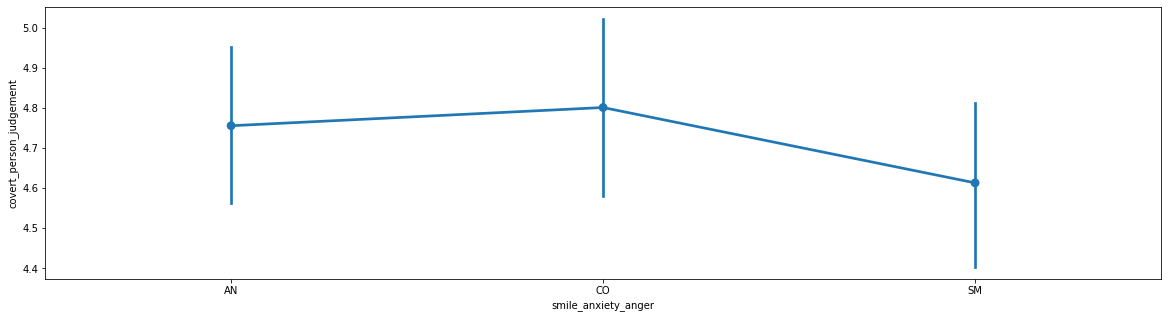

In [68]:
fig = plt.figure(figsize=(20,5))
sns.pointplot(data=data_df.groupby(['id', 'smile_anxiety_anger', 'repair_enhance']).agg({'covert_person_judgement':'mean'}).reset_index(), 
                        x='smile_anxiety_anger',
            y='covert_person_judgement',
            units='id',
            ci=95,
            dodge=True)


In [69]:
# RM-ANOVA
aov = pg.rm_anova(data=data_df.groupby(['id', 'smile_anxiety_anger', 'repair_enhance']).agg({'covert_person_judgement':'mean'}).reset_index(),
                  dv='covert_person_judgement',
                  within=['smile_anxiety_anger','repair_enhance'],
                  subject='id')
pg.print_table(aov)


ANOVA SUMMARY

Source                                    SS    ddof1    ddof2      MS       F    p-unc    p-GG-corr    np2    eps
------------------------------------  ------  -------  -------  ------  ------  -------  -----------  -----  -----
smile_anxiety_anger                   11.643        2      604   5.822   8.389    0.000        0.001  0.027  0.841
repair_enhance                         1.394        1      302   1.394   0.969    0.326        0.326  0.003  1.000
smile_anxiety_anger * repair_enhance  36.810        2      604  18.405  31.794    0.000        0.000  0.095  0.923



None of the individual differences on MFQ or SFH regressed the difference between positive and negative transformations

Effect: AN
Heteroscedasticity:
F(6,296)=0.59, p=0.7408

                            OLS Regression Results                            
Dep. Variable:        acceptable_norm   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.582
Date:                Wed, 30 Jun 2021   Prob (F-statistic):              0.152
Time:                        05:57:16   Log-Likelihood:                -421.20
No. Observations:                 303   AIC:                             856.4
Df Residuals:                     296   BIC:                             882.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

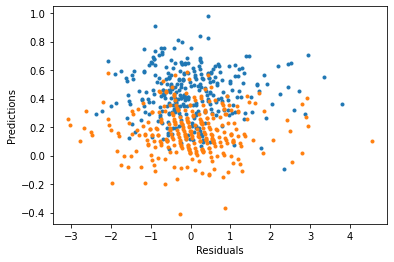

In [70]:
factors = ['MFQ_NN', 'MFQ_EQ', 'MFQ_LO', 'MFQ_AU', 'MFQ_PU', 'SF']

# normalize anger & smile vs anxiety
agg_dict = {factor:'first' for factor in factors}
agg_dict.update({'acceptable':'mean'})
a = data_df.groupby(['id','smile_anxiety_anger']).agg(agg_dict).reset_index()
anxiety_ratings = a[a.smile_anxiety_anger=="SM"][['id','acceptable']].set_index("id")
anxiety_ratings.rename(columns={'acceptable':'smile'}, inplace=True)
a=a.join(anxiety_ratings, on='id')
a['acceptable_norm'] = a.acceptable - a.smile

for effect in ['AN','CO']: 
    print('Effect: %s'%effect)
    x_fit = sm.add_constant(a[a.smile_anxiety_anger==effect][factors])
    rlm_model = sm.OLS(a[a.smile_anxiety_anger==effect].acceptable_norm, x_fit)
    rlm_results = rlm_model.fit()

    #rlm_model = sm.api.RLM(a.acceptable_norm,
    #               x_fit,
    #               M=sm.api.robust.norms.HuberT())
    #rlm_results = rlm_model.fit(cov='H3')
    
    # homoscedasticity
    bp = sm.stats.diagnostic.het_breuschpagan(rlm_results.resid, rlm_results.model.exog)
    print('Heteroscedasticity:\nF(%d,%d)=%.2f, p=%.4f\n'%(rlm_results.df_model,
                               rlm_results.df_resid,
                               bp[2],bp[3]))

    plt.plot(rlm_results.resid, rlm_results.fittedvalues,'.')
    plt.xlabel('Residuals')
    plt.ylabel('Predictions')

    print(rlm_results.summary())